In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#loading the dataset into a dataframe 
df = pd.read_csv('../data/raw/output_file.csv')
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
#dimension of the data
df.shape

(1581642, 9)

There are 1581642 rows and 9 columns.

In [5]:
#getting an idea about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581642 entries, 0 to 1581641
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1581642 non-null  object 
 1   Time                   1581642 non-null  object 
 2   Global_active_power    1581641 non-null  object 
 3   Global_reactive_power  1581641 non-null  object 
 4   Voltage                1581641 non-null  object 
 5   Global_intensity       1581641 non-null  object 
 6   Sub_metering_1         1581641 non-null  object 
 7   Sub_metering_2         1581641 non-null  object 
 8   Sub_metering_3         1573291 non-null  float64
dtypes: float64(1), object(8)
memory usage: 108.6+ MB


1. Need to combine Date and time column to datetime 
2. convert numeric columns stored as object data types to float

In [15]:
#converting numeric columns from object to float
numeric_cols = ['Global_active_power', 'Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3' ]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors = 'coerce')



In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581642 entries, 0 to 1581641
Data columns (total 10 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1581642 non-null  object 
 1   Time                   1581642 non-null  object 
 2   Global_active_power    1573291 non-null  float64
 3   Global_reactive_power  1573291 non-null  float64
 4   Voltage                1573291 non-null  float64
 5   Global_intensity       1573291 non-null  float64
 6   Sub_metering_1         1573291 non-null  float64
 7   Sub_metering_2         1573291 non-null  float64
 8   Sub_metering_3         1573291 non-null  float64
 9   col                    1573291 non-null  float64
dtypes: float64(8), object(2)
memory usage: 120.7+ MB


In [ ]:
# Convert Date + Time into a proper datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

In [19]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,col,Datetime
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,234.84,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,233.63,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,233.29,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,233.74,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,235.68,2006-12-16 17:28:00


In [7]:
# checking for null values 
df.isnull().sum()


Date                        0
Time                        0
Global_active_power         1
Global_reactive_power       1
Voltage                     1
Global_intensity            1
Sub_metering_1              1
Sub_metering_2              1
Sub_metering_3           8351
dtype: int64

1. There is one null value in columns global_active_power  global_reactive_power, voltage, global_intensity, sub_metering_1, sub_metering_2
2. sub_metering_3 column has 8351 null values which is huge.


In [ ]:
#Checking null values again
df.isna().sum()

Date                        0
Time                        0
Global_active_power      8351
Global_reactive_power    8351
Voltage                  8351
Global_intensity         8351
Sub_metering_1           8351
Sub_metering_2           8351
Sub_metering_3           8351
col                      8351
Datetime                    1
dtype: int64

1. After converting object columns to float, noticed all numeric columns now show 8351 NaN values.  
2. Earlier, only Sub_metering_3 had those missing entries.  
3. This likely means some rows had invalid symbols (like '?') that got turned into NaN during conversion.  
4. There's also one missing Datetime and an extra 'col' column.
5. Dropping the extra 'col' column — likely created from a trailing delimiter in the CSV. 
6. Will handle it properly during data cleaning.



<Axes: xlabel='Global_active_power', ylabel='Count'>

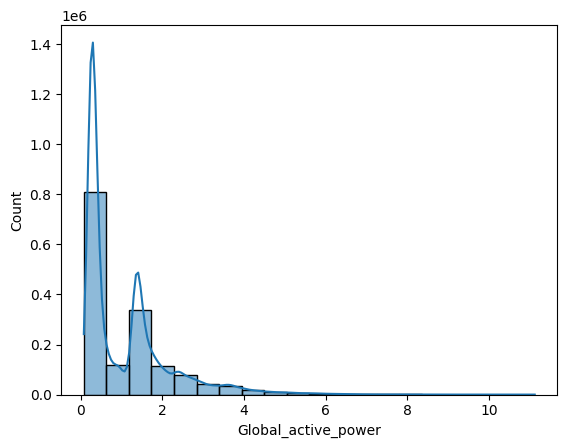

In [33]:
sns.histplot(df['Global_active_power'], bins = 20, kde = True)

1. Global_active_power shows a right-skewed distribution.
2. Most readings are under 1 kW, indicating low to moderate household power usage.
3. A smaller secondary peak around 1–2 kW suggests medium activity periods.
4. The long tail (up to ~10 kW) represents occasional high-usage spikes.


<Axes: xlabel='Voltage', ylabel='Count'>

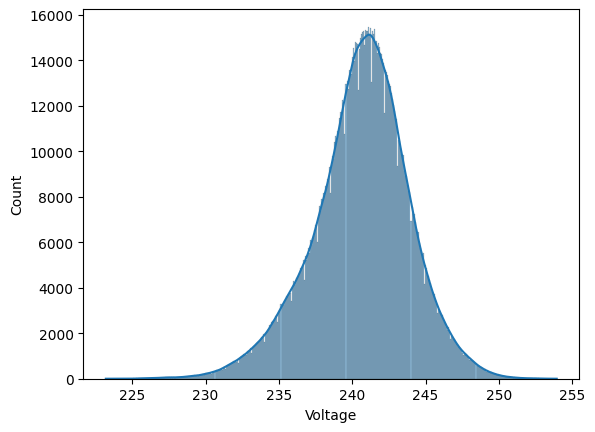

In [36]:
sns.histplot(df['Voltage'], kde = True)

1. Voltage follows a near-normal distribution centered around 240V.
2. Indicates stable power supply with minor fluctuations between ~235V and 245V.
3. No major voltage drops or spikes observed, suggesting consistent grid performance.


<Axes: xlabel='Global_reactive_power', ylabel='Count'>

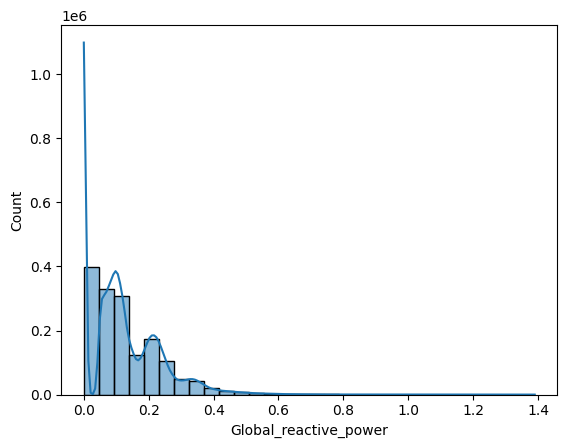

In [38]:
sns.histplot(df['Global_reactive_power'], bins = 30, kde = True )

1. Global_reactive_power is highly right-skewed with most values close to 0 kW.
2. Indicates that reactive (non-useful) power is minimal under normal conditions.
3. Occasional higher readings up to ~1.4 kW likely occur during the use of inductive appliances (e.g., motors).


<Axes: xlabel='Global_intensity', ylabel='Count'>

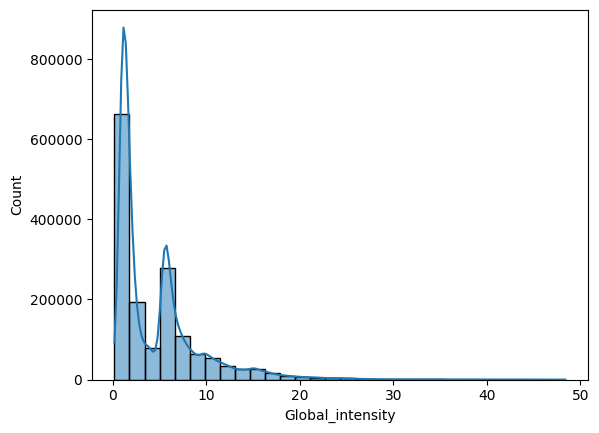

In [43]:
sns.histplot(df['Global_intensity'],kde = True, bins = 30)

1. Global_intensity is right-skewed, with most readings between 0–5 amps.
2. Indicates low to moderate power usage for most periods.
3. Occasional high spikes correspond to heavy appliance usage.
4. The trend closely follows Global_active_power since P = V × I.


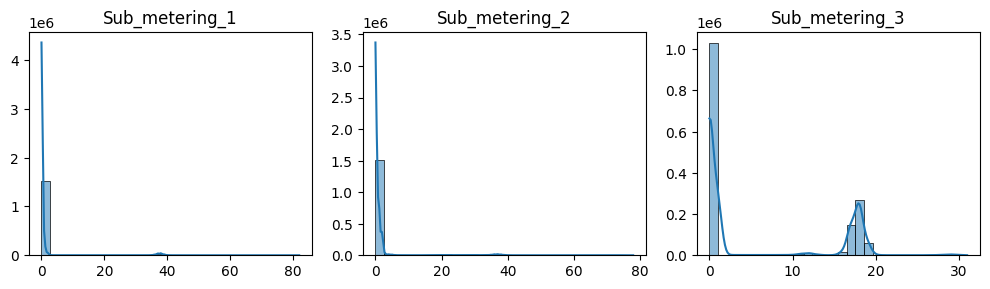

In [44]:
# Visualizing distributions of sub-metering features
def plotting(var, num):
    plt.subplot(3, 3, num)        # 3x3 grid – adjust if you have fewer/more plots
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(var)
    plt.xlabel('')
    plt.ylabel('')

plt.figure(figsize=(10, 8))
plotting('Sub_metering_1', 1)
plotting('Sub_metering_2', 2)
plotting('Sub_metering_3', 3)
plt.tight_layout()


1. All three sub-metering features are highly right-skewed with many zero readings.
2. This means those appliances or areas were often idle (no energy usage).
3. Sub_metering_3 shows a more visible second peak, suggesting more frequent or higher energy usage.
4. Overall, most household power usage is concentrated in short active periods.
5. Sub_metering_1 and Sub_metering_2: mostly off, occasional usage spikes.
6. Sub_metering_3: used more regularly — likely for high-consumption appliances like heaters or AC.

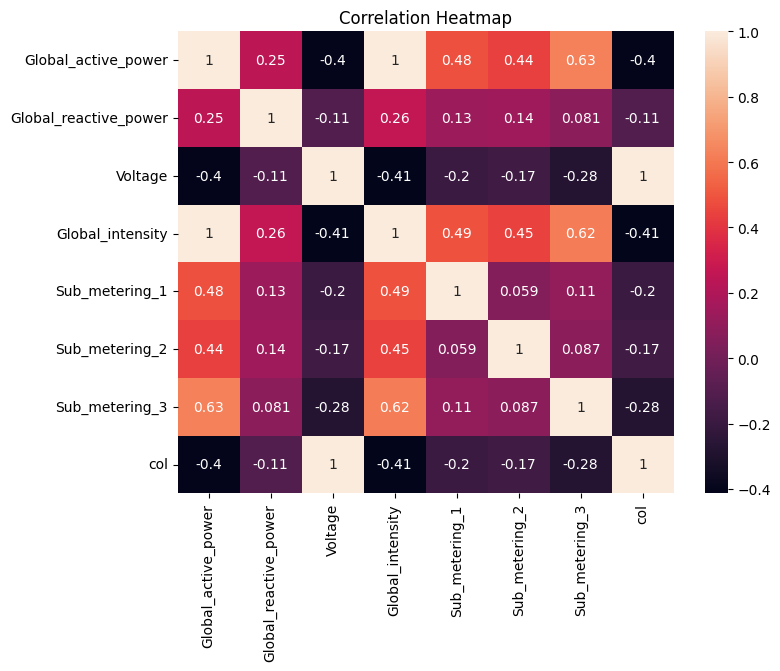

In [47]:
#checking correlation between variables using heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only = True), annot=True)
plt.title('Correlation Heatmap')
plt.show()

1.Global_active_power shows a strong positive correlation with Sub_metering_3 (0.63) and a moderate correlation with Sub_metering_1 (0.48) and Sub_metering_2 (0.44).
2.This means increases in these sub-meter readings are usually accompanied by higher overall power usage.

3.Voltage has a moderate negative correlation (-0.40) with Global_active_power and Global_intensity, suggesting that voltage tends to drop slightly when power demand increases.

4.Global_intensity is strongly related to Global_active_power (1.0 correlation),which makes sense since current directly influences power consumption.

5.Overall, the heatmap shows clear relationships between current, sub-metering values, and active power usage.

conclusion 
-> The most useful predictors for the model will likely be: Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
-> can ignore or drop col (that’s just an unwanted column).
-> Voltage might still be helpful but less influential.

## Plotting to understand relationships betweem target and predictor variables

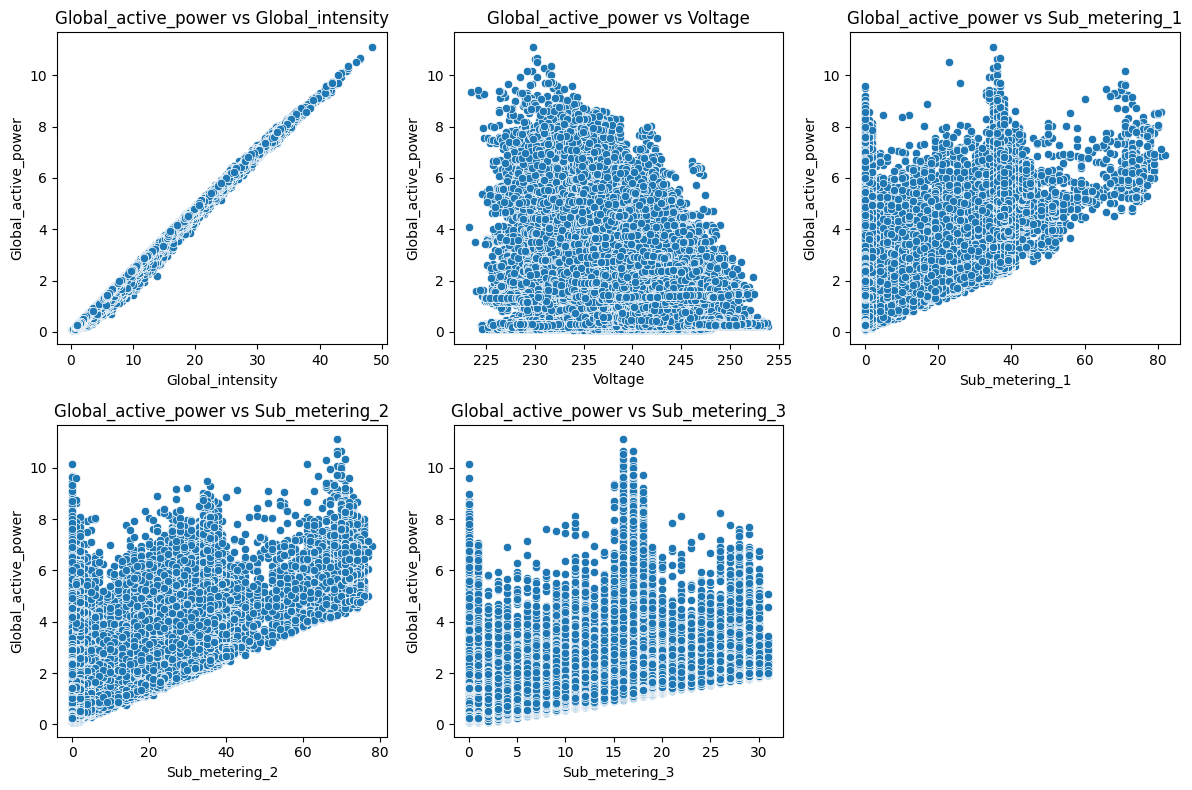

In [49]:
plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
sns.scatterplot(x='Global_intensity', y='Global_active_power', data=df)
plt.title('Global_active_power vs Global_intensity')

plt.subplot(2,3,2)
sns.scatterplot(x='Voltage', y='Global_active_power', data=df)
plt.title('Global_active_power vs Voltage')

plt.subplot(2,3,3)
sns.scatterplot(x='Sub_metering_1', y='Global_active_power', data=df)
plt.title('Global_active_power vs Sub_metering_1')

plt.subplot(2,3,4)
sns.scatterplot(x='Sub_metering_2', y='Global_active_power', data=df)
plt.title('Global_active_power vs Sub_metering_2')

plt.subplot(2,3,5)
sns.scatterplot(x='Sub_metering_3', y='Global_active_power', data=df)
plt.title('Global_active_power vs Sub_metering_3')

plt.tight_layout()
plt.show()


### Observations from Bivariate Analysis

- **Global_active_power vs Global_intensity**: Shows a clear positive linear relationship. As current increases, active power also increases — which makes sense physically.  
- **Global_active_power vs Voltage**: Displays a weak negative trend; power tends to drop slightly with higher voltage.  
- **Global_active_power vs Sub_metering_1, Sub_metering_2, Sub_metering_3**: Show weak to moderate positive correlations. Higher sub-meter readings generally align with higher active power but not in a perfectly linear way.  

Overall, `Global_intensity` appears to be the most strongly related feature to `Global_active_power`, while other features add smaller but relevant contributions.


### 🧠 Summary of Exploratory Data Analysis (EDA)

- The dataset shows no major structural issues, with most columns containing numeric data after type conversion.  
- Distributions of numerical features reveal that most energy-related variables (like `Global_active_power`, `Global_intensity`, and sub-metering values) are right-skewed, indicating higher usage during limited periods.  
- `Voltage` follows a near-normal distribution, suggesting a stable household power supply.  
- Correlation analysis shows a strong positive relationship between `Global_active_power` and `Global_intensity`, and moderate correlations with sub-metering features.  
- Bivariate plots confirm these relationships, showing that power consumption rises with increasing current and sub-meter readings.  

Overall, the EDA highlights consistent trends in household power usage and identifies key predictors (`Global_intensity` and sub-metering variables) for modeling.
